In [154]:
import os
import cv2
import glob
import time

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image, ImageTk

import tkinter as tk
from tkinter import Label, Button, PhotoImage, Frame

In [171]:
files = glob.glob('train_images/')
friends = glob.glob('friends/')
random.shuffle(friends)

In [177]:
class SwipingApp():

    def __init__(self, files):
        
        # Create GUI
        self.gui = tk.Tk(className="Cafe")
        self.gui.minsize(width=100, height=100)
        self.headline = Label(text="Welcome to the Cafe!", font=(None, 25))
        self.headline.pack()

        # Insert image
        self.image_paths = files
        self.sip_or_skip = []          # sip = 1, skip = 0
        
        path = self.image_paths[0]
        self.image_paths = self.image_paths[1:]
        im = Image.open(path).resize((512, 512))
        im = ImageTk.PhotoImage(im)
        self.panel = Label(image=im)
        self.panel.pack()
        
                
        # Add sip or skip labels
        self.btn_frame = Frame(self.gui)
        self.btn_frame.pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)
        
        self.btn_skip = Button(self.gui, text="Skip :(", command=self.skip, width=25, height=5, bg='red', fg='white', font=(None, 20))
        self.btn_sip = Button(self.gui, text="Sip :)", command=self.sip, width=25, height=5, bg='green', fg='white', font=(None, 20))
        
        self.btn_skip.pack(in_=self.btn_frame, side=tk.LEFT)
        self.btn_sip.pack(in_=self.btn_frame, side=tk.LEFT)

        # Start GUI
        self.gui.mainloop()
        
    def update_image(self):
#         print(self.image_paths)
        if self.image_paths:
            path = self.image_paths[0]
            self.image_paths = self.image_paths[1:]
            im = Image.open(path).resize((512, 512))
            im = ImageTk.PhotoImage(im)
            self.panel.configure(image=im)
            self.panel.image = im
        else:
            self.headline.destroy()
            self.panel.destroy()
            self.end = Label(text="There are no more images.\nThanks for sipping!", font=(None, 25), height=10)
            self.end.pack()
#             self.btn_frame.destroy()
            self.btn_skip["state"] = "disabled"
            self.btn_sip["state"] = "disabled"
#             self.gui.destroy()
        
        return
        
    def skip(self):
        print("Skip")
        self.sip_or_skip.append(0)
        self.update_image()
        
    def sip(self):
        print("Sip")
        self.sip_or_skip.append(1)
        self.update_image()
        
        
        
app = SwipingApp(files[:100])

Skip
Skip
Skip
Skip
Skip
Sip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Sip
Sip
Skip
Sip
Skip
Skip
Sip
Skip
Skip
Skip
Skip
Sip
Sip
Skip
Sip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Sip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip


In [181]:
first_100 = app.sip_or_skip
np.save('first_100.npy', first_100)

In [300]:
def find_face(cv2_image, plot=True):
    '''
    This function detects faces in an image.
    '''
    normal = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2GRAY)

    # Find faces in image
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = faceCascade.detectMultiScale(     # returns Rectangle(x, y, w, h)
            gray,
            scaleFactor=1.3,
            minNeighbors=3,
            minSize=(30, 30)
    )

    print("Found {0} Faces!".format(len(faces)))

    # Draw rectangle around face in image
    for (x, y, w, h) in faces:
        cv2.rectangle(normal, (x, y), (x+w, y+h), (0, 255, 0), 2)

    if plot: 
        plt.imshow(normal)
        plt.show();
        
    return normal


def find_all_friend(name):
    '''
    This function detects faces in all images of a specific person.
    All images that start with {name} will be passed into find_face()
    '''
    file_paths = glob.glob(f"friends/{name}*")
    faces = []
    
    fig, ax = plt.subplots(1, len(file_paths), figsize=(20, 10))
    for i in range(len(file_paths)):
        f = find_face(cv2.imread(file_paths[i]), 0)
        ax[i].imshow(f)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        fig.show()
        
        faces.append(f)
    
    return faces

Found 3 Faces!


<ipython-input-297-9cd8ed924ad0>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Found 1 Faces!
Found 1 Faces!
Found 1 Faces!
Found 1 Faces!
Found 2 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 1 Faces!
Found 1 Faces!
Found 0 Faces!
Found 0 Faces!
Found 1 Faces!
Found 0 Faces!
Found 1 Faces!
Found 1 Faces!
Found 1 Faces!


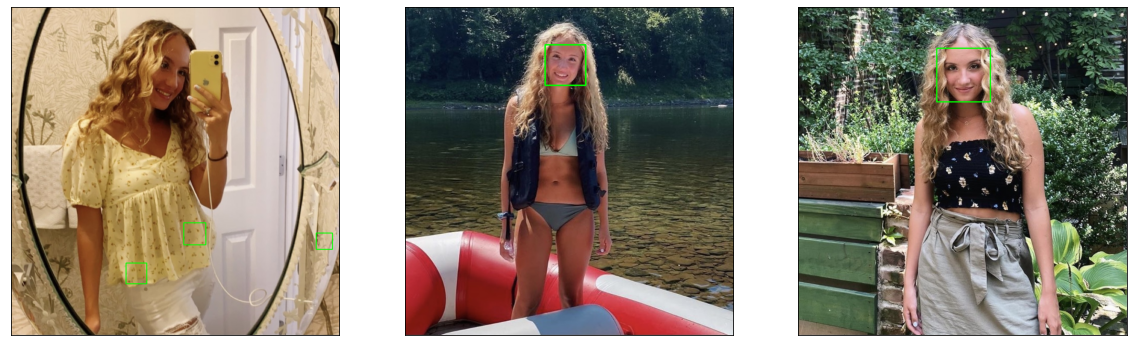

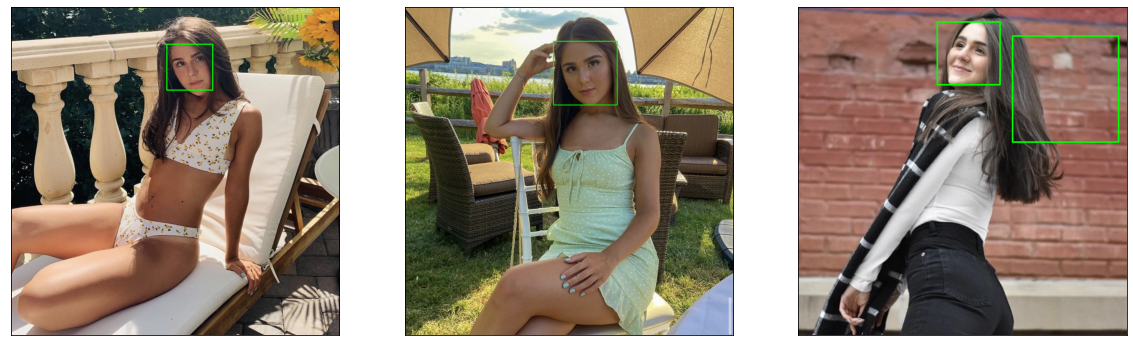

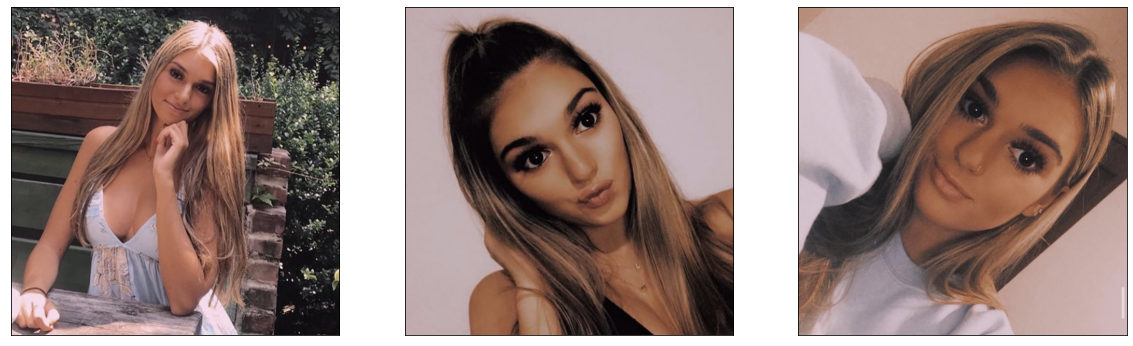

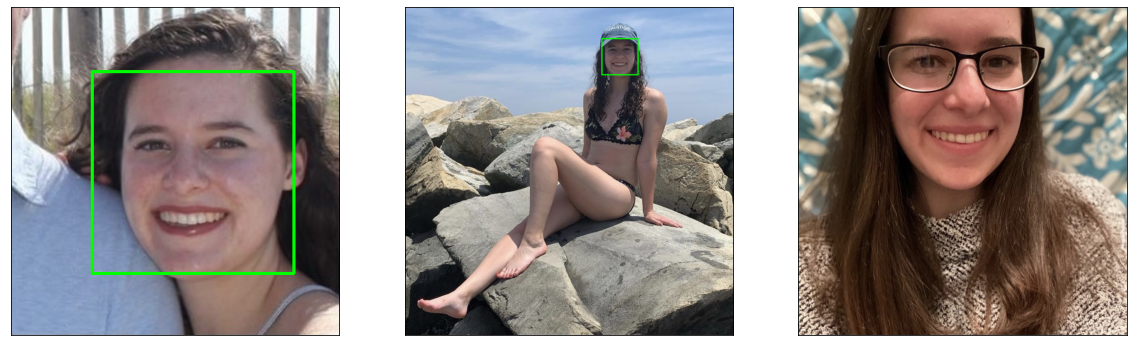

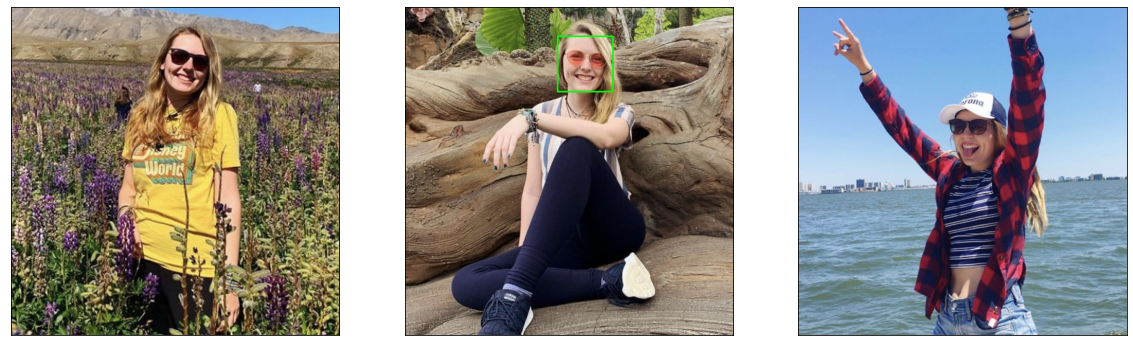

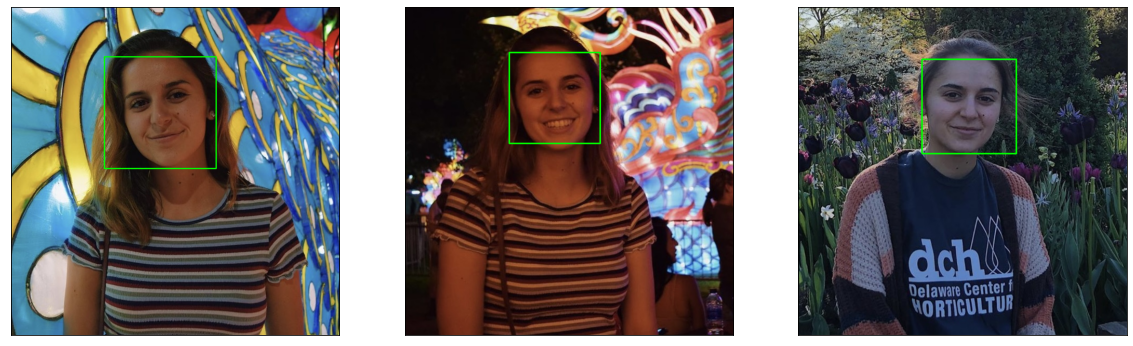

In [299]:
find_all_friend('jul');
find_all_friend('fel');
find_all_friend('laur');

find_all_friend('em');
find_all_friend('mad');
find_all_friend('mich');
